In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
hbar = 1.0545718e-34  # Reduced Planck constant (J.s)
m_e = 9.10938356e-31  # Electron mass (kg)
effective_mass = 0.26 * m_e  # Effective mass of electron in Si
joulesToEv = 1.6e-19 # 1eV is equal to 1.6*10^-19 Joules

In [3]:
def E_k(Lx, Ly, num_subbands, effective_mass):
    Lx = Lx*1e-9
    Ly = Ly*1e-9
    effective_mass = effective_mass * m_e
    
    kz = np.linspace(-2 * np.pi / 10e-9, 2 * np.pi / 10e-9, 500)

    E_nx_ny = []
    for nx in range(1, num_subbands + 1):
        for ny in range(1, num_subbands + 1):
            E_temp = (hbar**2 * np.pi**2/(2 * effective_mass)) * ((nx / Lx)**2 + (ny / Ly)**2)
            E_nx_ny.append((E_temp, nx, ny))
            
    E_nx_ny.sort(key=lambda x: x[0])
    E_previous = None
    plt.figure(figsize=(10, 7))
    for idx, (E_temp, nx, ny) in enumerate(E_nx_ny):
        E = E_temp + (hbar**2 / (2 * effective_mass)) * kz**2  # Total energy
        if E_previous is not None and E_previous == E_temp:
            plt.plot(kz, E/joulesToEv, linestyle="dashed", label=f"$n_x$={nx}, $n_y$={ny} degenerate state")  # Convert energy to eV
        else:
            plt.plot(kz, E/joulesToEv, label=f"$n_x$={nx}, $n_y$={ny}")  # Convert energy to eV
            
        E_previous = E_temp
        
    plt.title("E-k Diagram for Si Nanowire", fontsize=14)
    plt.xlabel("Wavevector $k_z$", fontsize=12)
    plt.ylabel("Energy $E$ (eV)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

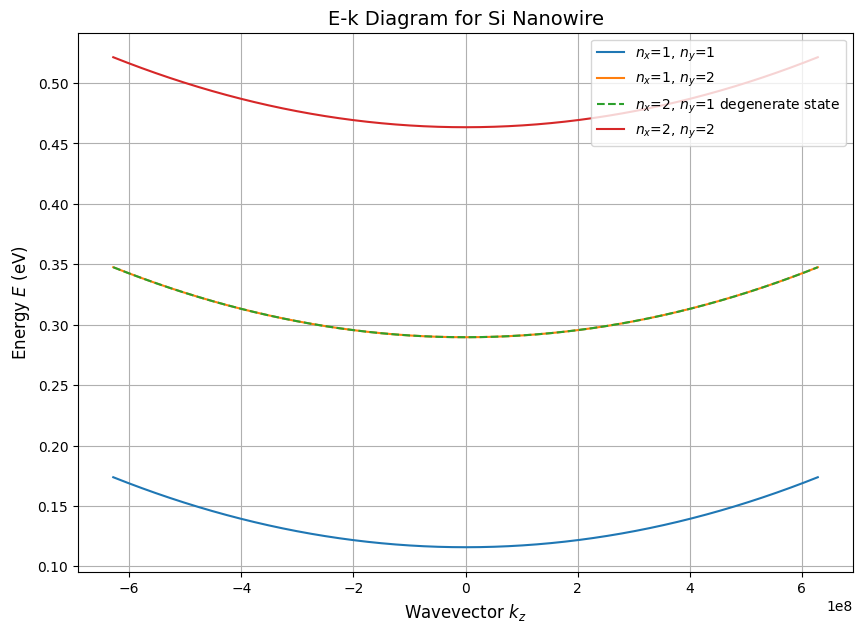

In [4]:
E_k(5, 5, 2, 0.26)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
def E_k_3D(Lx, Ly, num_subbands, effective_mass):
    Lx = Lx*1e-9
    Ly = Ly*1e-9
    effective_mass = effective_mass * m_e
    
    kz = np.linspace(-2 * np.pi / 10e-9, 2 * np.pi / 10e-9, 500)

    E_nx_ny = []
    for nx in range(1, num_subbands + 1):
        for ny in range(1, num_subbands + 1):
            E_temp = (hbar**2 * np.pi**2/(2 * effective_mass)) * ((nx / Lx)**2 + (ny / Ly)**2)
            E_nx_ny.append((E_temp, nx, ny))
            
    # Create the 3D E-k plot with confinement in x, y and free motion in z
    ax = plt.figure(figsize=(12, 12)).add_subplot(projection='3d')
    # Add each subband as a surface in the 3D plot
    for i, (E_temp, nx, ny) in enumerate(E_nx_ny):
        E_kz = E_temp + (hbar**2 / (2 * effective_mass)) * kz**2  # Total energy (J)
        ax.plot(kz, nx+ny, E_kz/joulesToEv, label=f"n_x={nx}, n_y={ny}")
    # Set labels and titles
    ax.set_title("E-k 3D Plot for Si Nanowire", fontsize=14)
    ax.set_xlabel("$k_z$", fontsize=12)
    ax.set_ylabel("$(n_x, n_y)$", fontsize=12)
    ax.set_zlabel("Energy $E$ (eV)", fontsize=10)
    ax.legend(loc='upper left', fontsize=8, title="Subbands")

    plt.show()

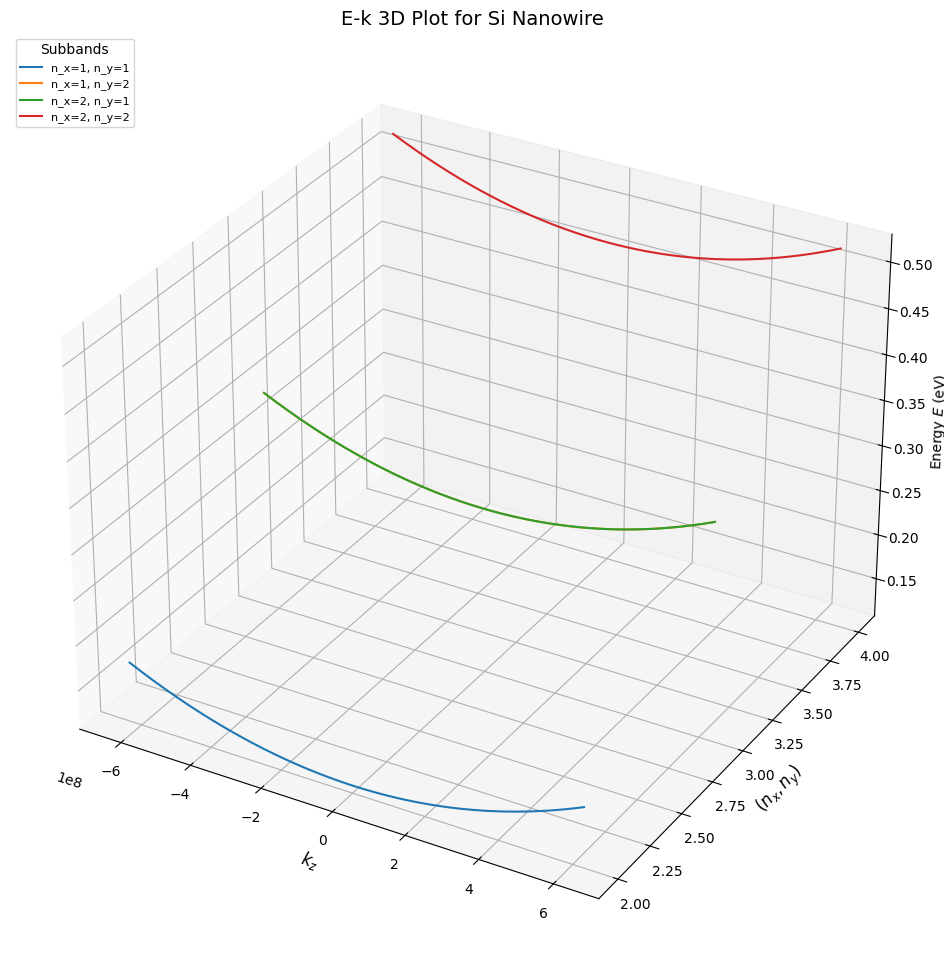

In [6]:
E_k_3D(5, 5, 2, 0.26)

In [7]:
def E_k_1D_plot(Lx, Ly, num_subbands, effective_mass, Kx=True):
    Lx = Lx*1e-9
    Ly = Ly*1e-9
    effective_mass = effective_mass * m_e
    
    print(type(num_subbands))
    E_nx_ny = []
    for nx in range(1, num_subbands + 1):
        for ny in range(1, num_subbands + 1):
            E_temp = (hbar**2 * np.pi**2/(2 * effective_mass)) * ((nx / Lx)**2 + (ny / Ly)**2)
            E_nx_ny.append((E_temp, nx, ny))
            
    E_nx_ny.sort(key=lambda x: x[0])
    plt.figure(figsize=(10, 7))

    E_previous = None
    for idx, (E_temp, nx, ny) in enumerate(E_nx_ny):
        E = E_temp
        
        if Kx == True:
            k = nx*np.pi/Lx
        else:
            k = ny*np.pi/Ly

        if E_previous is not None and E_previous == E_temp:
            plt.scatter(k, E/joulesToEv, linestyle="dashed", label=f"$n_x$={nx}, $n_y$={ny} degenerate state")  # Convert energy to eV
        else:
            plt.scatter(k, E/joulesToEv, label=f"$n_x$={nx}, $n_y$={ny}")  # Convert energy to eV
            
        E_previous = E_temp
        
    plt.title("$E_{nx,ny}$ - $k$ Diagram for Si Nanowire", fontsize=14)
    
    if Kx == True:
        plt.xlabel("Wavevector $k_x$", fontsize=12)
    else:
        plt.xlabel("Wavevector $k_y$", fontsize=12)
    plt.ylabel("Energy $E$ (eV)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

<class 'int'>


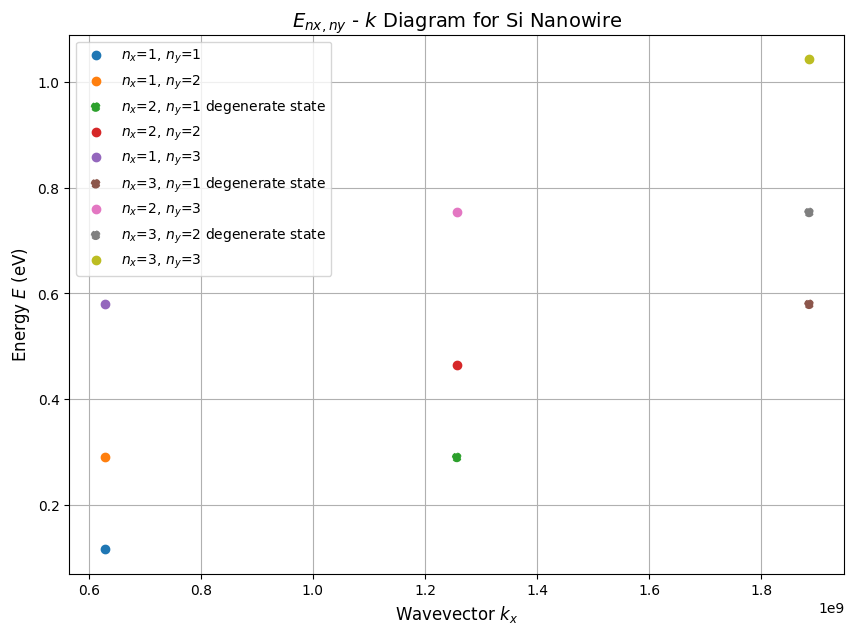

In [8]:
E_k_1D_plot(5, 5, 3, 0.26, Kx=True)

<class 'int'>


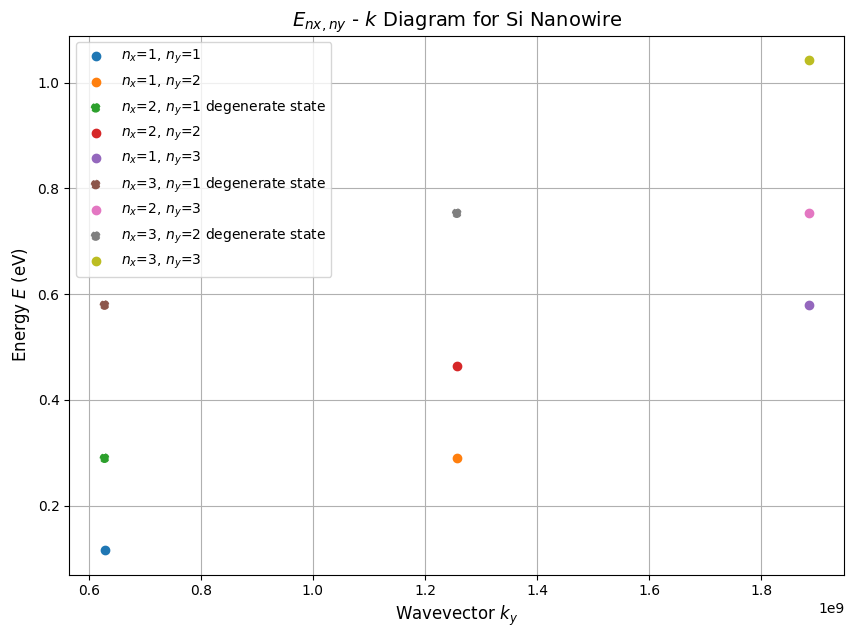

In [9]:
E_k_1D_plot(5, 5, 3, 0.26, Kx=False)

In [10]:
def E_k(Lx, Ly, num_subbands, effective_mass):
    Lx = Lx*1e-9
    Ly = Ly*1e-9
    effective_mass = effective_mass * m_e
    
    kz = np.linspace(-2 * np.pi / 10e-9, 2 * np.pi / 10e-9, 500)

    E_nx_ny = []
    for nx in range(1, num_subbands + 1):
        for ny in range(1, num_subbands + 1):
            E_temp = (hbar**2 * np.pi**2/(2 * effective_mass)) * ((nx / Lx)**2 + (ny / Ly)**2)
            E_nx_ny.append((E_temp, nx, ny))
            
    E_nx_ny.sort(key=lambda x: x[0])
    E_previous = None
    plt.figure(figsize=(10, 7))
    for idx, (E_temp, nx, ny) in enumerate(E_nx_ny):
        E = E_temp + (hbar**2 / (2 * effective_mass)) * kz**2  # Total energy
        if E_previous is not None and E_previous == E_temp:
            plt.plot(kz, E/joulesToEv, linestyle="dashed", label=f"$n_x$={nx}, $n_y$={ny} degenerate state")  # Convert energy to eV
        else:
            plt.plot(kz, E/joulesToEv, label=f"$n_x$={nx}, $n_y$={ny}")  # Convert energy to eV
            
        E_previous = E_temp
        
    plt.title("E-k Diagram for Si Nanowire", fontsize=14)
    plt.xlabel("Wavevector $k_z$", fontsize=12)
    plt.ylabel("Energy $E$ (eV)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
def Dos(Lx, Ly, num_subbands, effective_mass):
    Lx = Lx*1e-9
    Ly = Ly*1e-9
    effective_mass = effective_mass * m_e
    energy_range = np.linspace(0.1, 1.5, 500)
    energy_range_joules = energy_range * joulesToEv
    
    E_nx_ny = []
    for nx in range(1, num_subbands + 1):
        for ny in range(1, num_subbands + 1):
            E_temp = (hbar**2 * np.pi**2/(2 * effective_mass)) * ((nx / Lx)**2 + (ny / Ly)**2)
            E_nx_ny.append((E_temp, nx, ny))
    # Sort subband energies
    E_nx_ny = sorted(E_nx_ny)

    # Compute DOS for each energy in the range
    dos = []
    prefactor = np.sqrt(2 * effective_mass) / (hbar*np.pi)  # Prefactor in DOS formula
    for E in energy_range_joules:
        sum_dos = 0
        for E_temp, nx, ny in E_nx_ny:
            if E > E_temp:  # Only include subbands where E > E_sub
                sum_dos += prefactor / np.sqrt(E - E_temp)
        dos.append(sum_dos/joulesToEv)  # Convert DOS back to eV^-1

    plt.figure(figsize=(8, 6))
    plt.plot(dos, energy_range, linewidth=1.5)
    plt.title("Density of States (DOS) vs Energy", fontsize=14)
    plt.xlabel("Density of states (DOS)", fontsize=12)
    plt.ylabel("Energy", fontsize=12)
    plt.grid()
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_10197/3168327199.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


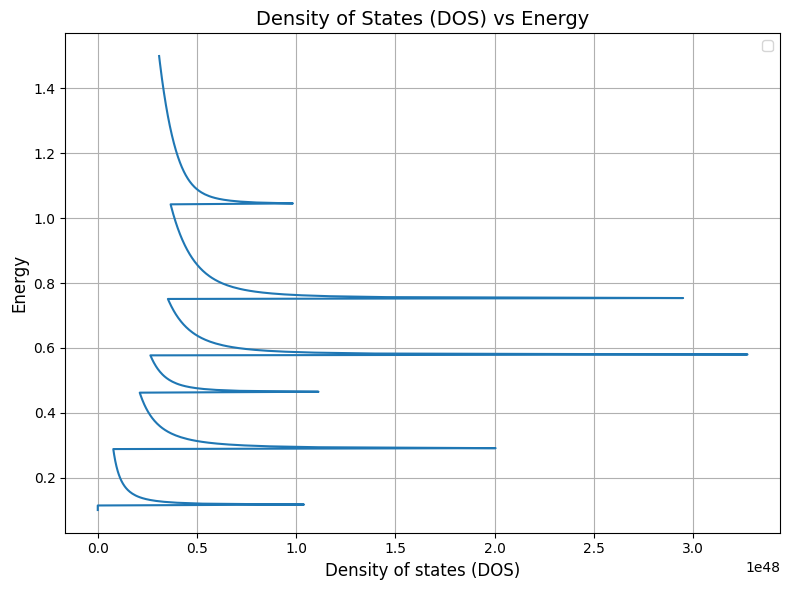

In [12]:
Dos(5, 5, 3, 0.26)